SPAM CLASSIFICATION


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
 df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [5]:
print("\nDistribution of 'label' variable:")
print(df['v1'].value_counts())


Distribution of 'label' variable:
ham     4825
spam     747
Name: v1, dtype: int64


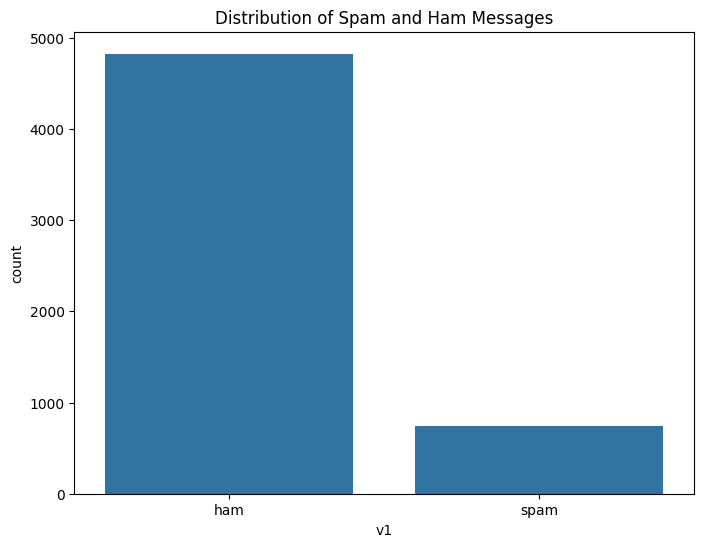

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [7]:
 df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [9]:
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [11]:
 svm_classifier = SVC(C=1.0, kernel='linear')
 svm_classifier.fit(X_train_tfidf, y_train)
 y_pred = svm_classifier.predict(X_test_tfidf)

In [12]:
 print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
 print("\nClassification Report:\n", classification_report(y_test, y_pred))
 print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[961   4]
 [ 19 131]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy: 0.979372197309417


In [13]:
user_message = input("Enter the message to classify: ")

Enter the message to classify: hi


In [14]:
message_tfidf = tfidf_vectorizer.transform([user_message])
prediction = svm_classifier.predict(message_tfidf)

In [15]:
result_df = pd.DataFrame({'v1': [prediction[0]], 'v2': [user_message]})
print("\nClassification Result:")
print(result_df)


Classification Result:
    v1  v2
0  ham  hi
